# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1 (Adriana Arce Jaimes): https://adrianaarce233.github.io/ 
- Integrante 2: ________________

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

## Resolución

1. Analizaremos una serie temporal de las tasas de referencia del BCRP.


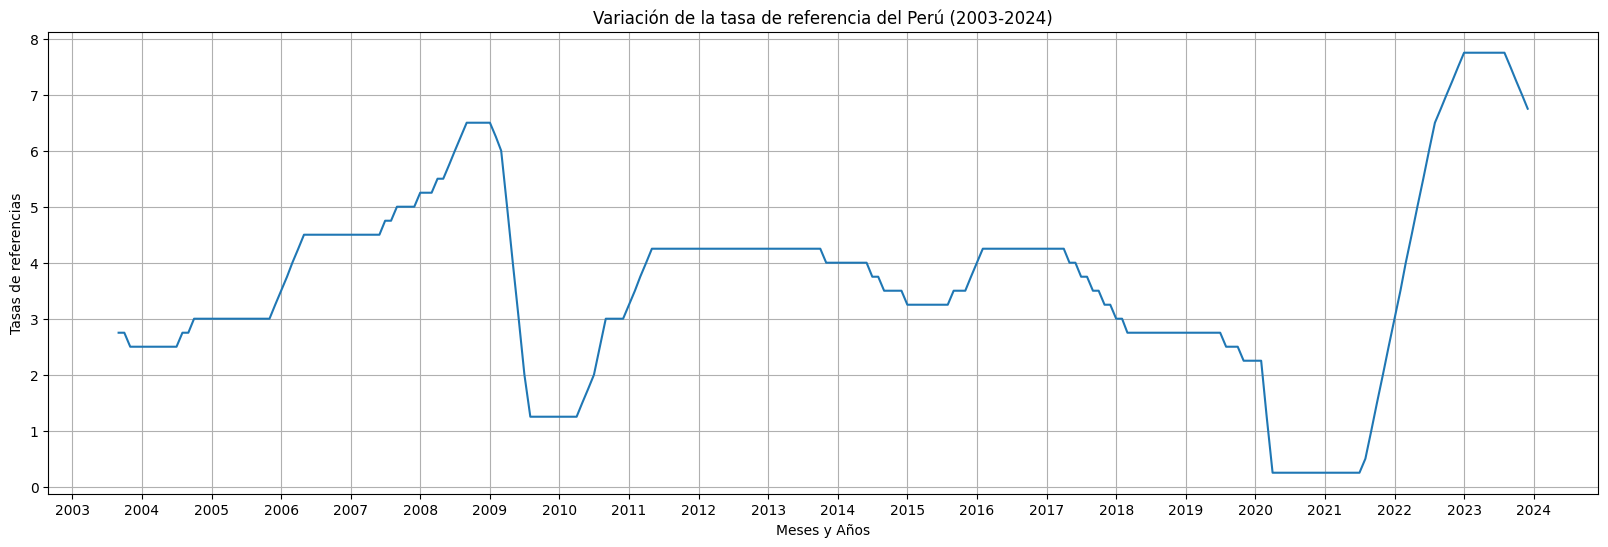

In [30]:
# Importamos bibliotecas:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Obtenemos los datos de la API del BCRP:
response = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04722MM/json/2003/2024/esp")
data = response.json()

# Extraemos los datos de la tasa referencial del BCRP
tasa_data = [{"month & year": item["name"], "tasa referencial": float(item["values"][0])} for item in data["periods"]]

# Creamos el DataFrame de las tasas referenciales
df_tasas = pd.DataFrame(tasa_data)

# Diccionario para mapear los nombres de los meses del español al inglés
month_map = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Función para convertir los nombres de los meses del español al inglés
def convert_month_name(date_str):
    for esp, eng in month_map.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Aplica la función a la columna 'month & year'
df_tasas['month & year'] = df_tasas['month & year'].apply(convert_month_name)

# Ahora puedes convertir la columna 'month & year' a formato datetime
df_tasas['month & year'] = pd.to_datetime(df_tasas['month & year'], format='%b.%Y')

# Ordenamos el DataFrame por fecha
df_tasas.sort_values('month & year', inplace=True)

# Creamos el primer gráfico
# 1. Crea la figura y el eje
fig, ax = plt.subplots(figsize=(20, 6))

# 2. Dibujamos los datos
ax.plot(df_tasas['month & year'], df_tasas['tasa referencial'])

# 3. Configuramos el formato de las fechas en el eje x
years = mdates.YearLocator()   # cada año
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 4. Configuramos las etiquetas y el título
ax.set_xlabel('Meses y Años')
ax.set_ylabel('Tasas de referencias')
ax.set_title('Variación de la tasa de referencia del Perú (2003-2024)')

# 5. Definimos la cuadrícula
ax.grid(True)

# 6. Mostramos el gráfico
plt.show()


In [32]:
#A través de nuestro análisis, hemos identificado que los años en los que la tasa referencial 
#alcanza sus valores pico y valle. Para ello, generaremos dos gráficos, uno que vaya desde el 
#año 2003 hasta el 2013 y luego otro que vaya desde el 2014 hasta el 2024.

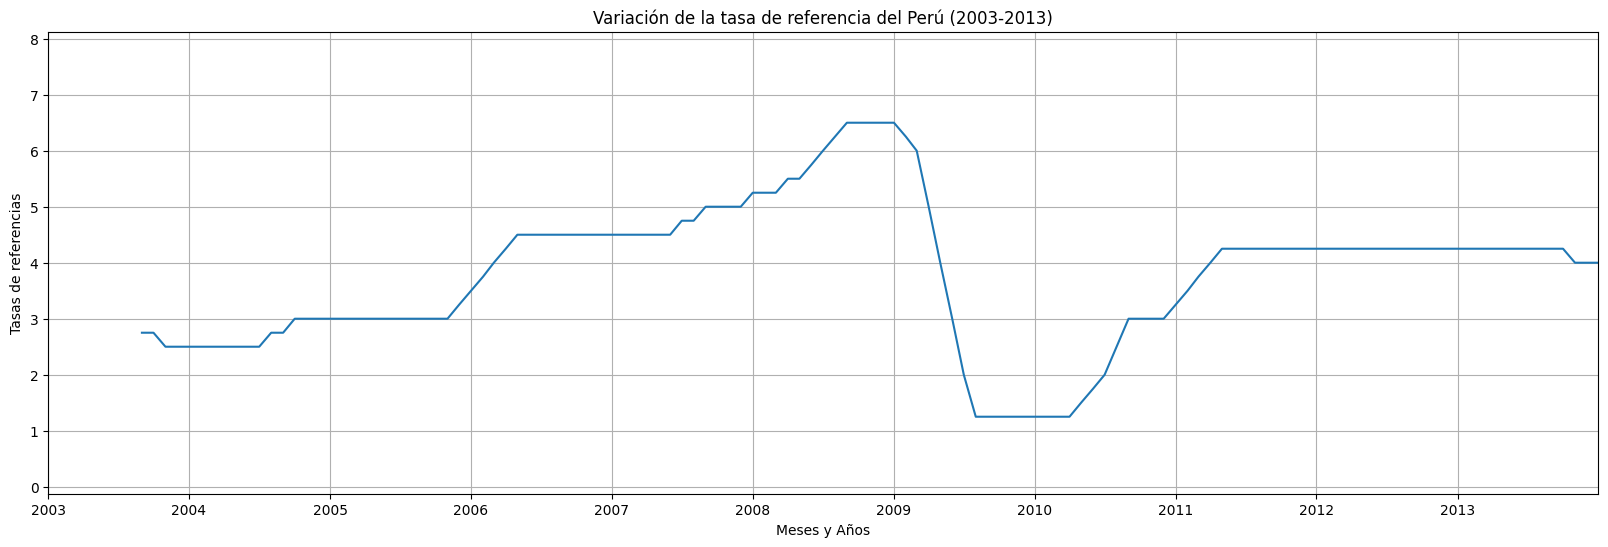

In [34]:
# Creamos el segundo gráfico
# 1. Crea la figura y el eje
fig, ax = plt.subplots(figsize=(20, 6))

# 2. Dibujamos los datos
ax.plot(df_tasas['month & year'], df_tasas['tasa referencial'])

# 3. Configuramos el formato de las fechas en el eje x
years = mdates.YearLocator()   # cada año
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 4. Configuramos las etiquetas y el título
ax.set_xlabel('Meses y Años')
ax.set_ylabel('Tasas de referencias')
ax.set_title('Variación de la tasa de referencia del Perú (2003-2013)')  # Actualiza el título

# 5. Definimos la cuadrícula
ax.grid(True)

# 6. Establecemos los límites del eje x
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2013-12-31'))

# 7. Mostramos el gráfico
plt.show()


In [36]:
# Filtra el DataFrame para incluir solo los datos de 2003 a 2013
df_tasas_filtered = df_tasas[(df_tasas['month & year'] >= '2003') & (df_tasas['month & year'] <= '2013')]

# Encuentra las filas con los valores máximos y mínimos de la tasa referencial
max_row = df_tasas_filtered[df_tasas_filtered['tasa referencial'] == df_tasas_filtered['tasa referencial'].max()]
min_row = df_tasas_filtered[df_tasas_filtered['tasa referencial'] == df_tasas_filtered['tasa referencial'].min()]

# Imprime el mes, el año y el valor de la tasa referencial para los valores máximos y mínimos
print("Entre 2003 y 2013, el valor máximo de la tasa referencial es {} y ocurrió en {}".format(max_row['tasa referencial'].values[0], max_row['month & year'].dt.strftime('%b %Y').values[0]))
print("Entre 2003 y 2013, el valor mínimo de la tasa referencial es {} y ocurrió en {}".format(min_row['tasa referencial'].values[0], min_row['month & year'].dt.strftime('%b %Y').values[0]))


Entre 2003 y 2013, el valor máximo de la tasa referencial es 6.5 y ocurrió en Sep 2008
Entre 2003 y 2013, el valor mínimo de la tasa referencial es 1.25 y ocurrió en Aug 2009


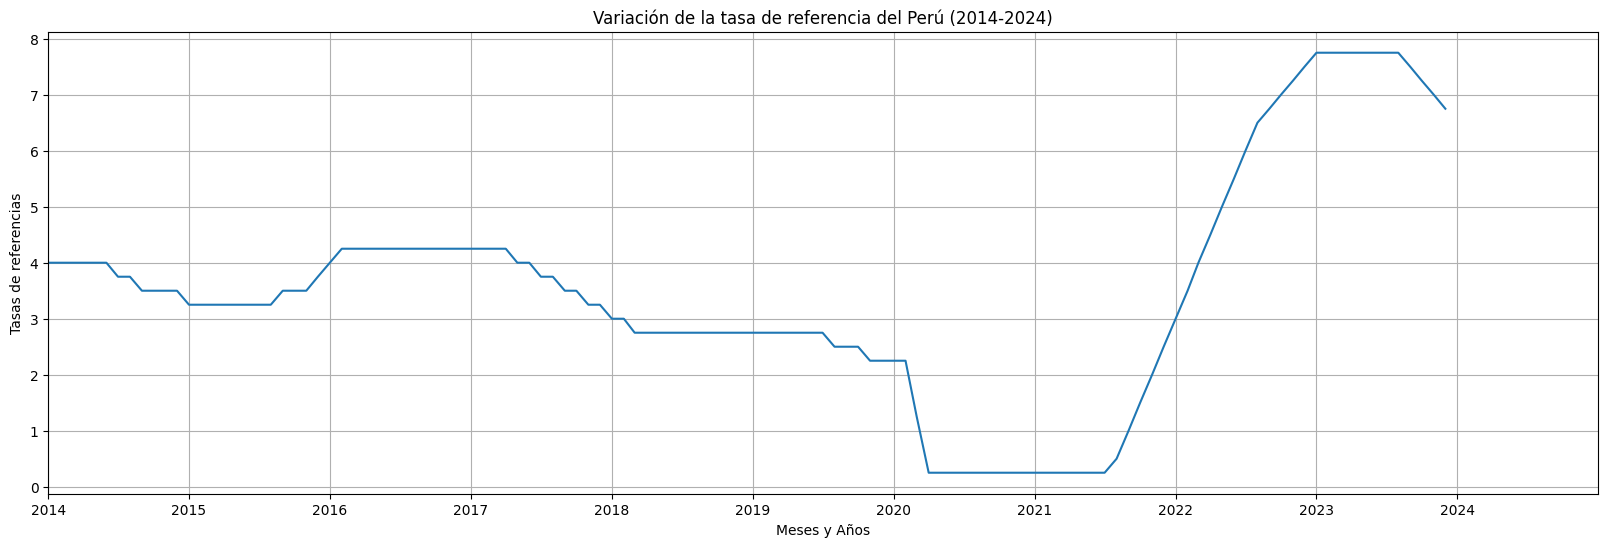

In [37]:
# Creamos el tercer gráfico
# 1. Crea la figura y el eje
fig, ax = plt.subplots(figsize=(20, 6))

# 2. Dibujamos los datos
ax.plot(df_tasas['month & year'], df_tasas['tasa referencial'])

# 3. Configuramos el formato de las fechas en el eje x
years = mdates.YearLocator()   # cada año
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 4. Configuramos las etiquetas y el título
ax.set_xlabel('Meses y Años')
ax.set_ylabel('Tasas de referencias')
ax.set_title('Variación de la tasa de referencia del Perú (2014-2024)')  # Actualiza el título

# 5. Definimos la cuadrícula
ax.grid(True)

# 6. Establecemos los límites del eje x
ax.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2024-12-31'))

# 7. Mostramos el gráfico
plt.show()


In [39]:
# Filtra el DataFrame para incluir solo los datos de 2014 a 2024
df_tasas_filtered = df_tasas[(df_tasas['month & year'] >= '2014') & (df_tasas['month & year'] <= '2024')]

# Encuentra las filas con los valores máximos y mínimos de la tasa referencial
max_row = df_tasas_filtered[df_tasas_filtered['tasa referencial'] == df_tasas_filtered['tasa referencial'].max()]
min_row = df_tasas_filtered[df_tasas_filtered['tasa referencial'] == df_tasas_filtered['tasa referencial'].min()]

# Imprime el mes, el año y el valor de la tasa referencial para los valores máximos y mínimos
print("Entre 2014 y 2024, el valor máximo de la tasa referencial es {} y ocurrió en {}".format(max_row['tasa referencial'].values[0], max_row['month & year'].dt.strftime('%b %Y').values[0]))
print("Entre 2014 y 2024, el valor mínimo de la tasa referencial es {} y ocurrió en {}".format(min_row['tasa referencial'].values[0], min_row['month & year'].dt.strftime('%b %Y').values[0]))

Entre 2014 y 2024, el valor máximo de la tasa referencial es 7.75 y ocurrió en Jan 2023
Entre 2014 y 2024, el valor mínimo de la tasa referencial es 0.25 y ocurrió en Apr 2020


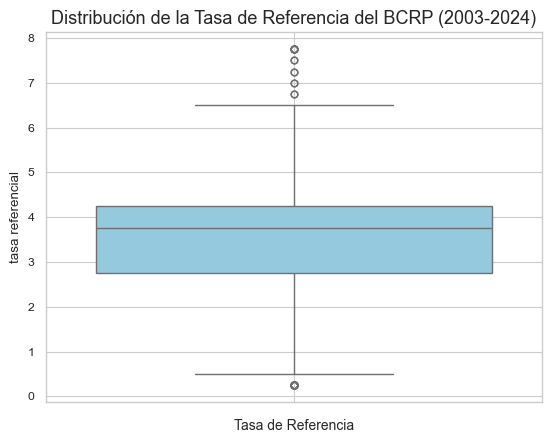

In [48]:
#Analizaremos la tasa de referencia con un gráfico de caja:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Establece el estilo y el contexto del gráfico para que sea más sofisticado
sns.set_style("whitegrid")
sns.set_context("paper")

# 2. Crea el gráfico
box_plot = sns.boxplot(df_tasas['tasa referencial'], color='skyblue')

# 3. Añade un título y etiquetas a los ejes
plt.title('Distribución de la Tasa de Referencia del BCRP (2003-2024)', fontsize=13)
plt.xlabel('Tasa de Referencia', fontsize=10)

# 4. Muestra las líneas de la cuadrícula
plt.grid(True)

# 5. Muestra el gráfico
plt.show()


2. Analizaremos una nota informativa del BCRP respecto a la última tasa de referencia.